In [1]:
import pickle
import datetime


In [2]:
with open('batsmandatabase__allMatches.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    batsmandatabase = unpickler.load() 
    file.close()
with open('bowlerdatabase__allMatches.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    bowlerdatabase = unpickler.load() 
    file.close()
    
with open('playerVplayer__2016_2020.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    playerVplayer = unpickler.load() 
    file.close()

In [3]:

bowlerperformancelist=[]
startdate='2016-01-01'
enddate='2021-01-01'

for bowler in list(bowlerdatabase.keys()):
    totalRuns=0
    totalBalls=0
    for j in bowlerdatabase[bowler]['Bowl']:
        if datetime.datetime.strptime(enddate, '%Y-%m-%d')<j['matchDate']\
        or datetime.datetime.strptime(startdate, '%Y-%m-%d')>j['matchDate']:
            continue
        totalRuns +=j['runs']
        totalBalls+=j['balls']
        bowlerseconomy=((totalRuns)/(totalBalls))*6
    if totalBalls >=400 :
        bowlerperformancelist.append([bowler,totalRuns,totalBalls,round(bowlerseconomy,2)])
bowlerperformancelist.sort(key=lambda x:x[3])
print(bowlerperformancelist[:20])

[['Rashid Khan', 1537, 1476, 6.25], ['Washington Sundar', 749, 654, 6.87], ['JJ Bumrah', 2032, 1722, 7.08], ['R Tewatia', 590, 500, 7.08], ['JC Archer', 988, 825, 7.19], ['KH Pandya', 1508, 1245, 7.27], ['AR Patel', 1659, 1343, 7.41], ['B Kumar', 1773, 1426, 7.46], ['RD Chahar', 799, 642, 7.47], ['Harbhajan Singh', 1240, 995, 7.48], ['SP Narine', 1832, 1470, 7.48], ['Mustafizur Rahman', 685, 547, 7.51], ['A Mishra', 1293, 1031, 7.52], ['Imran Tahir', 1202, 954, 7.56], ['R Ashwin', 1520, 1204, 7.57], ['YS Chahal', 1888, 1495, 7.58], ['DL Chahar', 1271, 1000, 7.63], ['Sandeep Sharma', 1823, 1420, 7.7], ['Z Khan', 650, 503, 7.75], ['RA Jadeja', 1624, 1257, 7.75]]


In [4]:
len(batsmandatabase['AT Rayudu']['bat'])

149

In [10]:
topteneconomicalbowlerlist=[]
for i in bowlerperformancelist[:20]:
    topteneconomicalbowlerlist.append(i[0])


In [11]:
topteneconomicalbowlerlist

['Rashid Khan',
 'Washington Sundar',
 'JJ Bumrah',
 'R Tewatia',
 'JC Archer',
 'KH Pandya',
 'AR Patel',
 'B Kumar',
 'RD Chahar',
 'Harbhajan Singh',
 'SP Narine',
 'Mustafizur Rahman',
 'A Mishra',
 'Imran Tahir',
 'R Ashwin',
 'YS Chahal',
 'DL Chahar',
 'Sandeep Sharma',
 'Z Khan',
 'RA Jadeja']

In [20]:
batsmanname=[]
careerstrikeratelast5years=[]
strikerate_thisBowler=[]
foursagainstBowler=[]
sixesagainstBowler=[]
dotpercentlist=[]
dotpercentlistagainstThisBowler=[]
inningsAgainstBowler=[]
dismissalAgainstBowler=[]
someBowler='SP Narine'
for bowler in topteneconomicalbowlerlist:
    if bowler!=someBowler:
        continue
    
    for batsman in list(batsmandatabase.keys()):
        totalRuns=0
        totalBalls=0
        totalsfours=0
        totalsixes=0
        outcount=0
        dotballs=0
        startdate='2016-01-01'
        enddate='2021-01-01'
        if playerVplayer[batsman][bowler]['validdata']==True:
            if playerVplayer[batsman][bowler]['ball']>=25:
#                 if playerVplayer[batsman][bowler]['strikerate']>110:
#                     continue
#                 print(bowler,batsman,playerVplayer[batsman][bowler])
                
                
                
            
    
                for j in batsmandatabase[batsman]['bat']:
                
                
                    if datetime.datetime.strptime(enddate, '%Y-%m-%d')<j['matchDate']\
                        or datetime.datetime.strptime(startdate, '%Y-%m-%d')>j['matchDate']:
                            continue
                    totalRuns+=j['run']
                    totalBalls+=j['ballsfaced']
                    totalsfours+=j['fours']
                    totalsixes+=j['sixes']
                    dotballs+=j['dots']
                    
                    if totalBalls==0:
                        dotballpercentage =0
                    else:
                        dotballpercentage=round((((dotballs)/(totalBalls))*100),2)
                    
                    if totalBalls==0:
                        SR=0
                    else:
                        SR=round((((totalRuns)/(totalBalls))*100),2)
                    if j['o/n']=='out':
                        outcount+=1

                    if outcount==0:
                        AVG=0
                    else:
                        AVG=round(((totalRuns)/(outcount)),2)
                        
                if len(batsmandatabase[batsman]['bat'])<10:
                    continue
#                 if SR<130 and AVG<25:
#                     continue
                if AVG<25:
                    continue

                if playerVplayer[batsman][bowler]['strikerate']-SR<-5:
                    continue
                    
#                 print(bowler,batsman,totalRuns,totalBalls,totalsfours,totalsixes,SR,AVG,playerVplayer[batsman][bowler],"\n")
                print(bowler,batsman,playerVplayer[batsman][bowler],"\n")
                batsmanname.append(batsman)
                careerstrikeratelast5years.append(SR)
                strikerate_thisBowler.append(round((playerVplayer[batsman][bowler]['strikerate']),2))
                foursagainstBowler.append(playerVplayer[batsman][bowler]['fours'])
                sixesagainstBowler.append(playerVplayer[batsman][bowler]['sixes'])
                dotpercentlist.append(dotballpercentage)
                dotpercentlistagainstThisBowler.append(round((((playerVplayer[batsman][bowler]['dot balls'])/(playerVplayer[batsman][bowler]['ball']))*100),2))
                inningsAgainstBowler.append(playerVplayer[batsman][bowler]['innings'])
                dismissalAgainstBowler.append(playerVplayer[batsman][bowler]['wicket'])
                
#     print(batsmanname) 
#     print(careerstrikeratelast5years)
#     print(strikerate_thisBowler)
#     print(foursagainstBowler)
#     print(sixesagainstBowler)
#     print(dotpercentlist)
#     print(dotpercentlistagainstThisBowler)
#     print(inningsAgainstBowler)
#     print(dismissalAgainstBowler)

SP Narine S Dhawan {'validdata': True, 'innings': 7, 'run': 40, 'ball': 29, 'wicket': 1, 'fours': 0, 'sixes': 4, 'dot balls': 9, 'avg': 40.0, 'strikerate': 137.93103448275863} 

SP Narine DA Warner {'validdata': True, 'innings': 8, 'run': 104, 'ball': 60, 'wicket': 1, 'fours': 10, 'sixes': 5, 'dot balls': 18, 'avg': 104.0, 'strikerate': 173.33333333333334} 

SP Narine KL Rahul {'validdata': True, 'innings': 5, 'run': 77, 'ball': 40, 'wicket': 2, 'fours': 5, 'sixes': 6, 'dot balls': 11, 'avg': 38.5, 'strikerate': 192.5} 

SP Narine SS Iyer {'validdata': True, 'innings': 5, 'run': 38, 'ball': 27, 'wicket': 0, 'fours': 0, 'sixes': 2, 'dot balls': 5, 'avg': 38, 'strikerate': 140.74074074074073} 

SP Narine RA Tripathi {'validdata': True, 'innings': 6, 'run': 53, 'ball': 33, 'wicket': 0, 'fours': 7, 'sixes': 2, 'dot balls': 11, 'avg': 53, 'strikerate': 160.6060606060606} 



In [21]:
batsmanVsomeBowler={}
for name in batsmanname:
    batsmanVsomeBowler[name]={}

for i in range(len(batsmanname)):
    batsmanVsomeBowler[batsmanname[i]]['SR_5years']=careerstrikeratelast5years[i]
    batsmanVsomeBowler[batsmanname[i]]['SR_VBowler']=strikerate_thisBowler[i]
    batsmanVsomeBowler[batsmanname[i]]['4s_VBowler']=foursagainstBowler[i]
    batsmanVsomeBowler[batsmanname[i]]['6s_VBowler']=sixesagainstBowler[i]
    batsmanVsomeBowler[batsmanname[i]]['dot%_5years']=dotpercentlist[i]
    batsmanVsomeBowler[batsmanname[i]]['dot%_VBowler']=dotpercentlistagainstThisBowler[i]
    batsmanVsomeBowler[batsmanname[i]]['inng_VBowler']=inningsAgainstBowler[i]
    batsmanVsomeBowler[batsmanname[i]]['dismissal_VBowler']=dismissalAgainstBowler[i]

print(len(batsmanVsomeBowler))
print(batsmanVsomeBowler)

5
{'S Dhawan': {'SR_5years': 132.19, 'SR_VBowler': 137.93, '4s_VBowler': 0, '6s_VBowler': 4, 'dot%_5years': 33.7, 'dot%_VBowler': 31.03, 'inng_VBowler': 7, 'dismissal_VBowler': 1}, 'DA Warner': {'SR_5years': 143.63, 'SR_VBowler': 173.33, '4s_VBowler': 10, '6s_VBowler': 5, 'dot%_5years': 33.16, 'dot%_VBowler': 30.0, 'inng_VBowler': 8, 'dismissal_VBowler': 1}, 'KL Rahul': {'SR_5years': 141.14, 'SR_VBowler': 192.5, '4s_VBowler': 5, '6s_VBowler': 6, 'dot%_5years': 34.02, 'dot%_VBowler': 27.5, 'inng_VBowler': 5, 'dismissal_VBowler': 2}, 'SS Iyer': {'SR_5years': 125.52, 'SR_VBowler': 140.74, '4s_VBowler': 0, '6s_VBowler': 2, 'dot%_5years': 34.85, 'dot%_VBowler': 18.52, 'inng_VBowler': 5, 'dismissal_VBowler': 0}, 'RA Tripathi': {'SR_5years': 134.79, 'SR_VBowler': 160.61, '4s_VBowler': 7, '6s_VBowler': 2, 'dot%_5years': 37.52, 'dot%_VBowler': 33.33, 'inng_VBowler': 6, 'dismissal_VBowler': 0}}


In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [23]:
batsmanname

['S Dhawan', 'DA Warner', 'KL Rahul', 'SS Iyer', 'RA Tripathi']

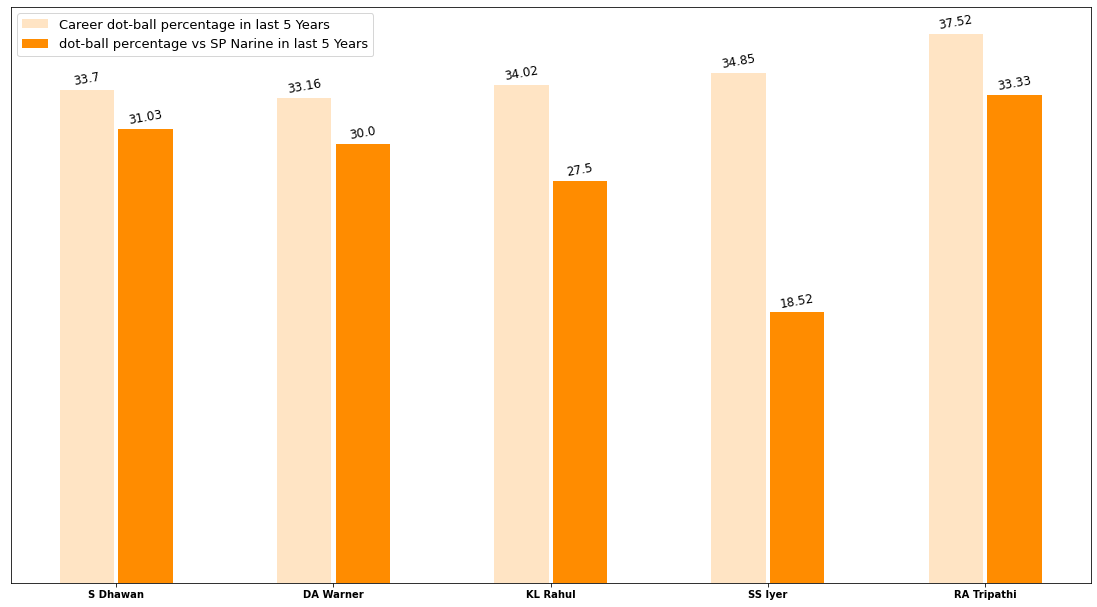

In [25]:
X = np.arange(len(batsmanVsomeBowler))
width = 0.25
fig=plt.figure(figsize=(15, 8))
ax = fig.add_axes([0,0,1,1])

rects1Label='Career dot-ball percentage in last 5 Years'
rects2Label='dot-ball percentage vs '+someBowler+' in last 5 Years'
# rects1Label='Career SR in last 5 Years'
# rects2Label='SR vs '+someBowler+' in last 5 Years'

rects1=ax.bar(X - (width/2+.01), dotpercentlist, color = 'bisque', width = width, label=rects1Label)
rects2=ax.bar(X + (width/2+.01), dotpercentlistagainstThisBowler, color = 'darkorange', width = width, label=rects2Label)

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.005*h, h,
                ha='center', va='bottom',size=12,rotation=10) #bar-head font-size

autolabel(rects1)
autolabel(rects2)

ax.legend(prop={'size': 13})

x=list()
for i in X:
    x.extend([i,i+.001])
ax.set_xticks(X) #X for dotballs x for SR

xticklabels=[]
for i in range(len(batsmanname)):
    xticklabels.append(batsmanname[i])
#     xticklabels.append("\nInnings: "+str(inningsAgainstBowler[i])+\
#                 "\n4s: "+str(foursagainstBowler[i])+", 6s: "+str(sixesagainstBowler[i])+\
#                 "\nDismissals: "+str(dismissalAgainstBowler[i]))
ax.set_xticklabels(xticklabels,size=10) #x-axis fontsize
for label in ax.get_xticklabels():
    if label.get_text() in batsmanname:
        label.set_weight('bold')
ax.yaxis.set_visible(False)
plt.show()
fig.savefig(someBowler+'_goodBatsmenDotBalls.png',bbox_inches='tight',pad_inches=0,dpi=500) #change filename

In [224]:
len(xticklabels)

21